<img src="logo.jpg" />

## [Prof. Pedram Jahangiry](https://huntsman.usu.edu/directory/jahangiry-pedram) 
[GitHub account](https://github.com/PJalgotrader) 

[YouTube Channel](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ/playlists) 

# Support Vector Machines (SVM) - Classification

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [117]:
rand_state = 1000

In [118]:
df = pd.read_csv("bikeshare.csv")

In [119]:
df.head()

,season,yr,mnth,hr,holiday,weekday,notbizday,weathersit,temp,hum,windspeed,dteday,cnt
0,1,0,1,0,0,6,1,1,-1.334609,0.947345,-1.553844,2011-01-01,16
1,1,0,1,1,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,40
2,1,0,1,2,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,32
3,1,0,1,3,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,13
4,1,0,1,4,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,1


## Data preprocessing 

In [120]:
df.isna().sum()  

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
notbizday     0
weathersit    0
temp          0
hum           0
windspeed     0
dteday        0
cnt           0
dtype: int64

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
notbizday     17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
dteday        17379 non-null object
cnt           17379 non-null int64
dtypes: float64(3), int64(9), object(1)
memory usage: 1.7+ MB


The managers of Capital Bikeshare have found that the system works smoothly until more than 500 bikes are rented in any one hour. At that point, it becomes necessary to insert extra bikes into the system and move them across stations to balance loads.

In [122]:
overload = np.where(df['cnt']>500,1,0)

In [123]:
pd.crosstab(overload,overload, normalize='all')*100

col_0,0,1
row_0,,
0,92.640543,0.000000
1,0.000000,7.359457


The dataset is relatively imbalanced. 

In [124]:
df['overload']=overload
df.drop('cnt', axis=1, inplace=True)
df.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'notbizday',
       'weathersit', 'temp', 'hum', 'windspeed', 'dteday', 'overload'],
      dtype='object')

We need to change the type of categorical variables: 

In [125]:
categorical = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'notbizday','weathersit',]

for col in categorical: 
    df[col] = df[col].astype("category")

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
season        17379 non-null category
yr            17379 non-null category
mnth          17379 non-null category
hr            17379 non-null category
holiday       17379 non-null category
weekday       17379 non-null category
notbizday     17379 non-null category
weathersit    17379 non-null category
temp          17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
dteday        17379 non-null object
overload      17379 non-null int32
dtypes: category(8), float64(3), int32(1), object(1)
memory usage: 749.1+ KB


In [127]:
df.drop('dteday',axis=1, inplace=True)

In [128]:
df.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'notbizday',
       'weathersit', 'temp', 'hum', 'windspeed', 'overload'],
      dtype='object')

In [129]:
df.columns.difference(categorical)

Index(['hum', 'overload', 'temp', 'windspeed'], dtype='object')

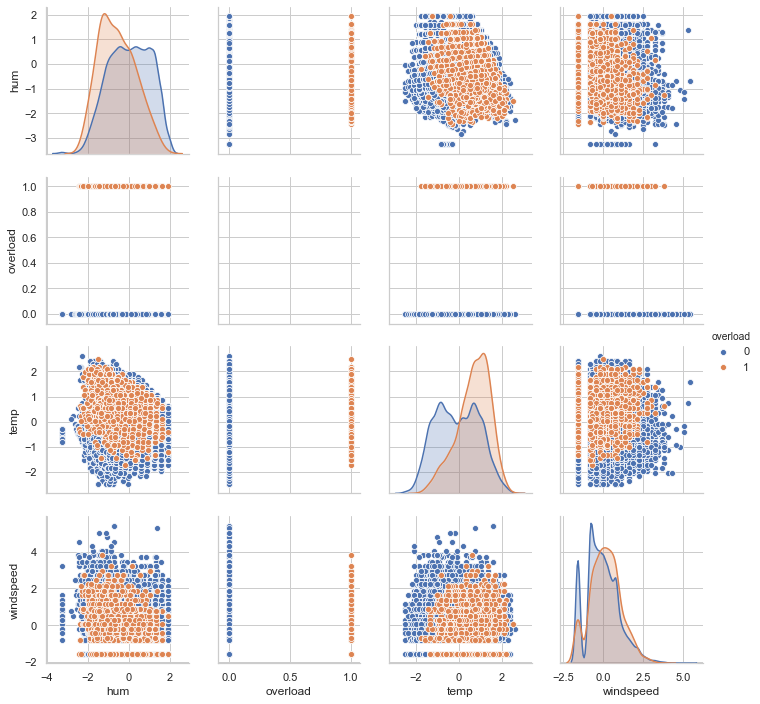

In [130]:
sns.set_style('whitegrid')
sns.pairplot(df[df.columns.difference(categorical)], hue='overload')

## Scaling the features: 

Scaling the variables is a very important step in SVM. Because any variable on the larger scale, has a larger effect on the **distance** between observations. 

for this data set we are going to use standardization as our scaling strategy. 


In [131]:
df = pd.get_dummies(df, drop_first=True)

In [132]:
df.columns

Index(['temp', 'hum', 'windspeed', 'overload', 'season_2', 'season_3',
       'season_4', 'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_1',
       'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'holiday_1', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'notbizday_1', 'weathersit_2', 'weathersit_3', 'weathersit_4'],
      dtype='object')

In [133]:
df.shape

(17379, 53)

In [134]:
df.head()

,temp,hum,windspeed,overload,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,notbizday_1,weathersit_2,weathersit_3,weathersit_4
0,-1.334609,0.947345,-1.553844,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,-1.438475,0.895513,-1.553844,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,-1.438475,0.895513,-1.553844,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,-1.334609,0.636351,-1.553844,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,-1.334609,0.636351,-1.553844,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [135]:
from sklearn.preprocessing import StandardScaler

In [136]:
scale = StandardScaler()
df_sc = scale.fit_transform(df)
df_sc = pd.DataFrame(df_sc, columns=df.columns)
df_sc['overload']=df['overload']

In [137]:
df_sc.head()

,temp,hum,windspeed,overload,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,notbizday_1,weathersit_2,weathersit_3,weathersit_4
0,-1.334648,0.947372,-1.553889,0,-0.583042,-0.590751,-0.567361,-1.005134,-0.289161,-0.304313,...,-0.407892,-0.405394,-0.407508,-0.407124,-0.408659,2.432774,1.4669,-0.595006,-0.298177,-0.01314
1,-1.438516,0.895539,-1.553889,0,-0.583042,-0.590751,-0.567361,-1.005134,-0.289161,-0.304313,...,-0.407892,-0.405394,-0.407508,-0.407124,-0.408659,2.432774,1.4669,-0.595006,-0.298177,-0.01314
2,-1.438516,0.895539,-1.553889,0,-0.583042,-0.590751,-0.567361,-1.005134,-0.289161,-0.304313,...,-0.407892,-0.405394,-0.407508,-0.407124,-0.408659,2.432774,1.4669,-0.595006,-0.298177,-0.01314
3,-1.334648,0.636370,-1.553889,0,-0.583042,-0.590751,-0.567361,-1.005134,-0.289161,-0.304313,...,-0.407892,-0.405394,-0.407508,-0.407124,-0.408659,2.432774,1.4669,-0.595006,-0.298177,-0.01314
4,-1.334648,0.636370,-1.553889,0,-0.583042,-0.590751,-0.567361,-1.005134,-0.289161,-0.304313,...,-0.407892,-0.405394,-0.407508,-0.407124,-0.408659,2.432774,1.4669,-0.595006,-0.298177,-0.01314


### Defining the variables and splitting the data

In [138]:
y = df_sc['overload']
X = df_sc.drop('overload', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

---

###  SVM Classification with Sklearn

In [139]:
from sklearn.svm import SVC

In [140]:
# Fitting SVM regression to the Training set
SVM_classification = SVC()
SVM_classification.fit(X_train, y_train)

SVC()

In [141]:
# Predicting the Test set results
y_hat = SVM_classification.predict(X_test)


In [142]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.tail(20)

,y_test,y_hat
17161,0,0
10948,1,1
4579,1,0
7639,0,0
13180,0,0
13129,0,0
852,0,0
15113,0,0
5733,0,0
13623,0,0


### Evaluating the model on test dataset¶

---

In [143]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score



def my_SVM_report(X_train, y_train, X_test,y_test, C=1,gamma='scale' ,kernel='rbf'):
    svc= SVC(C=C, gamma=gamma, kernel=kernel)
    svc.fit(X_train, y_train)
    y_hat = svc.predict(X_test)
    
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test,y_hat) ,4)
    error_rate = round(1-accuracy,4)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])
    
    print("-----------------------------------------")
    print('Accuracy  = {}'.format(accuracy))
    print('Error_rate  = {}'.format(error_rate))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print("-----------------------------------------")
    return cm_labled
 

In [144]:
my_SVM_report(X_train, y_train, X_test,y_test, kernel='rbf')

-----------------------------------------
Accuracy  = 0.9701
Error_rate  = 0.0299
Precision = 0.88
Recall    = 0.7
f1_score  = 0.78
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,4782,37
Actual : positive,119,276


### ROC and AUC 

We cannot define ROC and AUC in SVM. Why?

---

## Tuning hyperparameters: 
### Gridsearch
Finding the right hyper parameters (like C, gamma and the Kernel function) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a **Gridsearch**, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation.

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.

. **C** represents **cost** of misclassification. A large C means that you are penalizing the errors more restricly so the margin will be narrower ie overfitting (small bias, big variance) https://scikit-learn.org/stable/modules/svm.html

. **gamma** is the free prameter in the radial basis function (rbf). Intuitively, the gamma parameter (inverse of variance) defines how far the influence of a single training example reaches with low values meaning ‘far’ and high values meaning ‘close’. 
https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

In [145]:
my_param_grid = {'C': [10,100,1000], 'gamma': ['scale',0.01,0.001], 'kernel': ['rbf']} 

In [147]:
from sklearn.model_selection import GridSearchCV

In [148]:
GridSearchCV(estimator=SVC(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [10, 100, 1000], 'gamma': ['scale', 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [149]:
grid = GridSearchCV(estimator=SVC(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )
# verbose just means the text output describing the process.  (the greater the number the more detail you will get).

In [150]:
# May take a while!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.9s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.8s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.8s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.8s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.8s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.8s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.7s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.8s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.7s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.7s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   1.0s
[CV] END ......................C=10, gamma=0.001,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [10, 100, 1000], 'gamma': ['scale', 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

What **fit** does is a bit more involved than usual. First, it tries multiple combinations from param_grid by cross-validation to find the best parameter combination. Once it has the best combination, it retrain the model using optimal hyperparameters on the entire train set.

In [151]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [152]:
grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [153]:
y_hat_optimized = grid.predict(X_test)

In [154]:
predictions['y_hat_optimized'] = y_hat_optimized
predictions.tail(20)

,y_test,y_hat,y_hat_optimized
17161,0,0,0
10948,1,1,1
4579,1,0,1
7639,0,0,0
13180,0,0,0
13129,0,0,0
852,0,0,0
15113,0,0,0
5733,0,0,0
13623,0,0,0


In [155]:
my_SVM_report(X_train, y_train, X_test,y_test,C=1000, gamma=0.001)

-----------------------------------------
Accuracy  = 0.9737
Error_rate  = 0.0263
Precision = 0.84
Recall    = 0.81
f1_score  = 0.82
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,4758,61
Actual : positive,76,319


---

#### Cross validation
We will use Cross validation to estimate performance metrics in the test set. 

In [38]:
from sklearn.model_selection import cross_val_score

In [156]:
# 6.1
f1_score = cross_val_score(estimator = SVC(C=1000, gamma=0.001), X = X_train, y = y_train, cv = 5 , scoring="f1" )

In [157]:
f1_score

array([0.820059  , 0.83775811, 0.84813754, 0.82253521, 0.7877095 ])

In [159]:
f1_CV=round(f1_score.mean(),4)
f1_CV

0.8232

---
### Advance Visualization (this part is optional) 

Visualising the Training set results (in 2D of course!). We have to rerun the whole model with 2 explanatory variables

Let's balance our target variables first!

In [160]:
df_vis = df_sc[['overload', 'temp', 'windspeed']]

In [164]:
pd.crosstab(df_vis['overload'], df_vis['overload'])

overload,0,1
overload,,
0,16100,0
1,0,1279


In [165]:
df_vis.loc[df_vis['overload']==1,].head()

,overload,temp,windspeed
2659,1,1.054335,0.886099
2683,1,0.950466,1.374096
2684,1,0.950466,2.106501
2707,1,0.846597,1.618504
2732,1,0.742729,1.374096


In [167]:
sample(df_vis.index, 3)

[4, 10, 2]

In [174]:
from random import sample
sample(list(df_vis.loc[df_vis['overload']==0,].index),5)

[12030, 6955, 3624, 900, 11837]

In [175]:
overloads_only     = sample(list(df_vis.loc[df_vis['overload']==1,].index),100)
non_overloads_only = sample(list(df_vis.loc[df_vis['overload']==0,].index),100)
df1 = df_vis.iloc[overloads_only,]
df0 = df_vis.iloc[non_overloads_only,]

In [176]:
df_vis = pd.concat([df1,df0]) 
df_vis

,overload,temp,windspeed
10240,1,0.327253,2.228296
16368,1,-0.503697,0.519896
11955,1,0.119516,-0.456099
13572,1,1.573679,1.130506
16382,1,-0.815304,-0.456099
16056,1,-0.919172,0.276306
15179,1,0.638860,0.519896
5564,1,1.262073,0.886099
11916,1,1.158204,0.031899
14868,1,0.846597,-1.553889


In [177]:
X= df_vis[['temp', 'windspeed']]
y= df_vis[['overload']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test) 

In [178]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

## Fitting SVM classifier to the Training set

In [237]:
SVM_classifier = SVC(C=1, kernel='rbf')
SVM_classifier.fit(X_train, y_train.values.reshape(-1,))

SVC(C=1)

In [238]:
# Predicting the Test set results
y_pred = SVM_classifier.predict(X_test)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


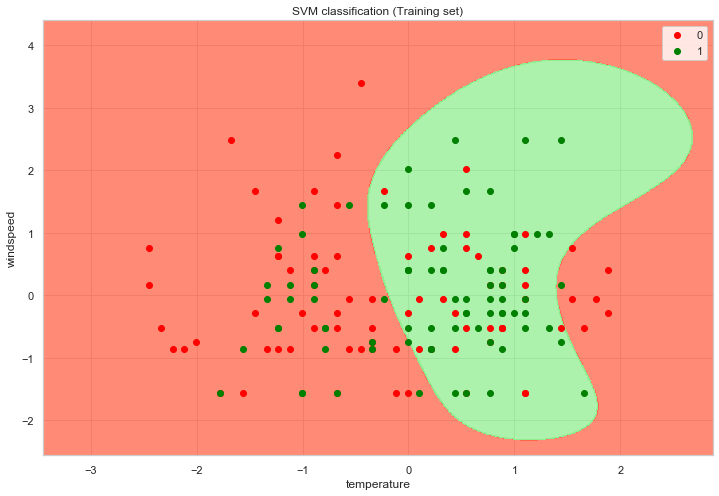

In [239]:
# visualization
plt.figure(figsize=(12,8))

X_set, y_set = X_train, y_train.iloc[:,0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


from matplotlib.colors import ListedColormap
plt.contourf( X1, X2 , SVM_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM classification (Training set)')
plt.xlabel('temperature')
plt.ylabel('windspeed')
plt.legend()
plt.show()

### Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


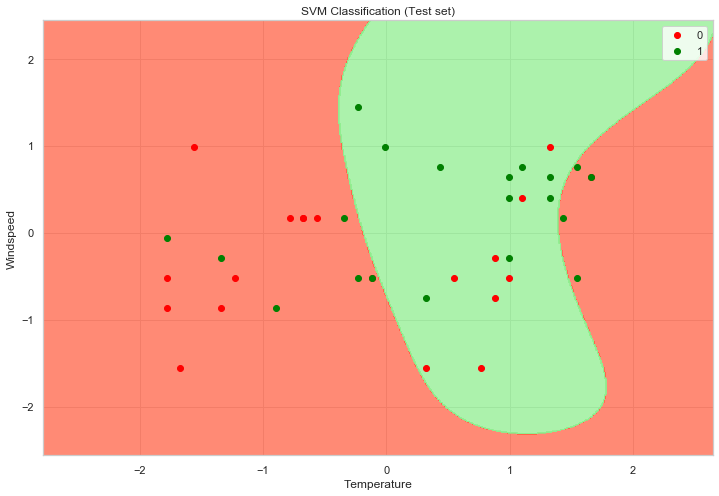

In [240]:
plt.figure(figsize=(12,8))

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test.iloc[:,0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, SVM_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Classification (Test set)')
plt.xlabel('Temperature')
plt.ylabel('Windspeed')
plt.legend()
plt.show()

In [241]:
print(confusion_matrix(y_test, y_pred))

[[12  8]
 [10 10]]


**FUN exercise**: now try the following combinations:
1. kernel = 'linear' , 'poly'
2. kernel= 'rbf', C=1, C=0.0001 and C=100000 
3. Kernel= 'rbt' , C=1, gamma= 0.01, gamma = 10 



---

#### Additional links

1. SKlearn documentation : https://scikit-learn.org/stable/modules/svm.html
2. Convex Optimization : https://www.amazon.com/dp/0521833787/?coliid=I1FTQ8R03FUUQK&colid=VIHSBPX6N52B&psc=1&ref_=lv_ov_lig_dp_it
3. Performance measures (1): https://en.wikipedia.org/wiki/Confusion_matrix
4. ROC curve: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
5. Multiple class SVM in Python: https://towardsdatascience.com/multiclass-classification-with-support-vector-machines-svm-kernel-trick-kernel-functions-f9d5377d6f02
6. GridsearchCV documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
7. Decision boundary visualization in Python: https://github.com/MichalOleszak/KnowledgeBank/blob/master/blog_posts/svm_kernels/svm_kernels.ipynb